## ロジスティック回帰モデルの比較
## (sklearnライブラリ vs 手動)

---

<a name='ex-03'></a>

### 予測関数

$$
f_{\mathbf{w},b}(\mathbf{x}) = g\left(\mathbf{w} \cdot \mathbf{x} + b \right)
$$

シグモイド関数 \( g(z) \) ：

$$
g(z) = \frac{1}{1 + e^{-z}}
$$

---

### コスト関数

1サンプルあたりの損失：

$$
\text{loss}\left(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}\right) = - y^{(i)} \log\left(f_{\mathbf{w},b}(\mathbf{x}^{(i)})\right) - (1 - y^{(i)}) \log\left(1 - f_{\mathbf{w},b}(\mathbf{x}^{(i)})\right)
$$

---

### コスト関数（全体）

データセット全体のコスト関数は、全サンプルの平均損失：

$$
J(\mathbf{w}, b) = \frac{1}{m} \sum_{i=0}^{m-1} \text{loss}\left(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}\right)
$$

---

### 勾配（偏微分）

パラメータ \( w_j \) とバイアス \( b \) に関する勾配：

$$
\frac{\partial J(\mathbf{w}, b)}{\partial w_j} = \frac{1}{m} \sum_{i=0}^{m-1} \left(f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)} \right) x_j^{(i)}
$$

$$
\frac{\partial J(\mathbf{w}, b)}{\partial b} = \frac{1}{m} \sum_{i=0}^{m-1} \left(f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)} \right)
$$

---

### パラメータ更新（勾配降下法）

学習率 \(\alpha\) を用いて、パラメータを更新する

$$
\begin{cases}
b := b - \alpha \frac{\partial J(\mathbf{w}, b)}{\partial b} \\
w_j := w_j - \alpha \frac{\partial J(\mathbf{w}, b)}{\partial w_j} \quad (j=0,1,\ldots,n-1)
\end{cases}
$$

この操作を収束するまで繰り返す


In [4]:
#ライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression

Iteration 0: Cost 0.6781
Iteration 100: Cost 0.3104
Iteration 200: Cost 0.2619
Iteration 300: Cost 0.2421
Iteration 400: Cost 0.2312
Iteration 500: Cost 0.2243
Iteration 600: Cost 0.2197
Iteration 700: Cost 0.2163
Iteration 800: Cost 0.2139
Iteration 900: Cost 0.2120
[manual] 実行時間: 0.0732 秒


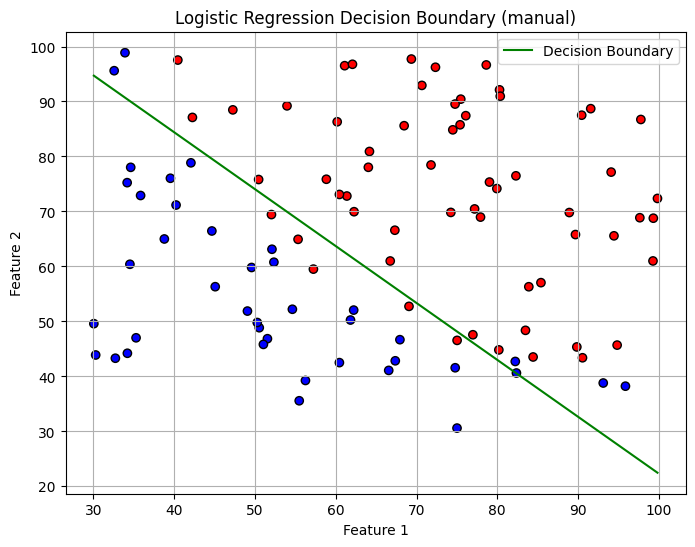

In [ ]:
# ロジスティック回帰モデルの実装(手動)
# 時間計測開始
start_time = time.time()

# データ読み込み
data = pd.read_csv("data/ex2data3.txt", header=None)
X_train = data.iloc[:, :-1].values  # shape = (m, 2)
y_train = data.iloc[:, -1].values   # shape = (m,)

# 特徴量の標準化
X_mean = np.mean(X_train, axis=0)
X_std = np.std(X_train, axis=0)
X_norm = (X_train - X_mean) / X_std

# パラメータの初期化
m, n = X_norm.shape
w = np.zeros(n)
b = 0.0

# ハイパーパラメータ
alpha = 0.1
iterations = 1000

# シグモイド関数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# コスト関数
def compute_cost(X, y, w, b):
    z = np.dot(X, w) + b
    h = sigmoid(z)
    epsilon = 1e-5  # log(0) 回避
    cost = -(1 / m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
    return cost

# 勾配計算
def compute_gradient(X, y, w, b):
    z = np.dot(X, w) + b
    h = sigmoid(z)
    error = h - y
    dj_dw = (1 / m) * np.dot(X.T, error)
    dj_db = (1 / m) * np.sum(error)
    return dj_dw, dj_db

# 勾配降下法
for i in range(iterations):
    dj_dw, dj_db = compute_gradient(X_norm, y_train, w, b)
    w -= alpha * dj_dw
    b -= alpha * dj_db

    if i % (iterations // 10) == 0:
        cost = compute_cost(X_norm, y_train, w, b)
        print(f"Iteration {i}: Cost {cost:.4f}")

# 時間計測終了
end_time = time.time()
print(f"[manual] 実行時間: {end_time - start_time:.4f} 秒")

# 決定境界の描画（元のスケールに戻す版）
def plot_decision_boundary_manual(X_norm, y, w, b, X_mean, X_std):
    x1 = np.linspace(X_norm[:, 0].min(), X_norm[:, 0].max(), 100)
    x2 = -(w[0] * x1 + b) / w[1]

    # 元のスケールに戻す
    x1_real = x1 * X_std[0] + X_mean[0]
    x2_real = x2 * X_std[1] + X_mean[1]

    plt.figure(figsize=(8, 6))
    plt.scatter(X_norm[:, 0] * X_std[0] + X_mean[0], X_norm[:, 1] * X_std[1] + X_mean[1], 
                c=y, edgecolors='k', cmap=plt.cm.bwr, marker='o')
    plt.plot(x1_real, x2_real, label='Decision Boundary', color='green')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Logistic Regression Decision Boundary (manual)')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_decision_boundary_manual(X_norm, y_train, w, b, X_mean, X_std)


[sklearn] 実行時間: 0.0172 秒


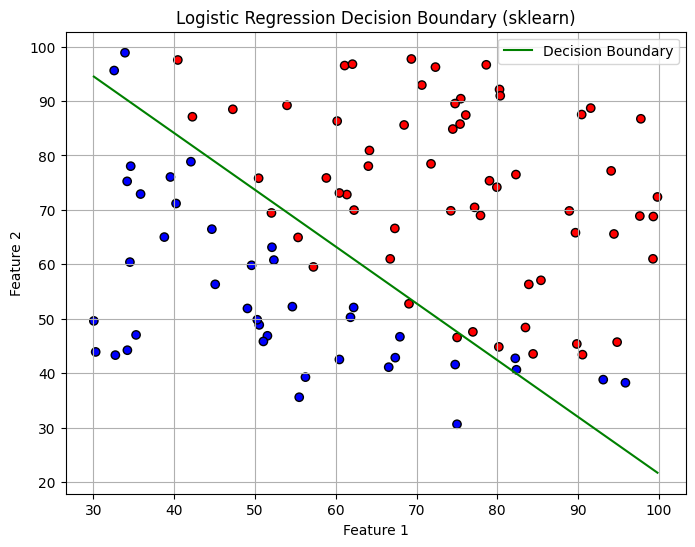

In [ ]:
# ロジスティック回帰モデルの実装(sklearn)
start_time = time.time()

# データ読み込み
data = pd.read_csv("data/ex2data3.txt", header=None)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# 特徴量の標準化（元の描画に合わせて）
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_norm = (X - X_mean) / X_std

# sklearn ロジスティック回帰（一次特徴量）を標準化データで学習
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_norm, y)

# 時間計測終了
end_time = time.time()
print(f"[sklearn] 実行時間: {end_time - start_time:.4f} 秒")

# 決定境界の描画関数
def plot_decision_boundary_scaled(X, y, model, X_mean, X_std):
    # 標準化データのx1範囲
    x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    w = model.coef_[0]
    b = model.intercept_[0]
    x2 = -(w[0] * x1 + b) / w[1]

    # 元のスケールに戻す
    x1_real = x1 * X_std[0] + X_mean[0]
    x2_real = x2 * X_std[1] + X_mean[1]

    # 描画
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0] * X_std[0] + X_mean[0], X[:, 1] * X_std[1] + X_mean[1], c=y, 
                edgecolors='k', cmap=plt.cm.bwr, marker='o')
    plt.plot(x1_real, x2_real, label='Decision Boundary', color='green')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Logistic Regression Decision Boundary (sklearn)')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_decision_boundary_scaled(X_norm, y, model, X_mean, X_std)
